In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('normality_summary_grid.csv')
data.head()

,Function,Noise,N_Train,N_Tree,Normal_Pct_Finite
0,func_cos_p2,normal,25,20,60.0
1,func_cos_p2,normal,25,50,59.0
2,func_cos_p2,normal,25,100,64.0
3,func_cos_p2,normal,25,150,65.0
4,func_cos_p2,normal,25,200,66.5


In [72]:
data_melt = pd.melt(data, id_vars=['Function', 'Noise', 'N_Train', 'N_Tree'],
                    value_vars=['Normal_Pct_Finite'],
                    var_name='type', value_name='pct')
# select only noise = normal / t
data_melt = data_melt[(data_melt['Noise'] == 'normal') | (data_melt['Noise'] == 't')]
data_melt.head()

,Function,Noise,N_Train,N_Tree,type,pct
0,func_cos_p2,normal,25,20,Normal_Pct_Finite,60.0
1,func_cos_p2,normal,25,50,Normal_Pct_Finite,59.0
2,func_cos_p2,normal,25,100,Normal_Pct_Finite,64.0
3,func_cos_p2,normal,25,150,Normal_Pct_Finite,65.0
4,func_cos_p2,normal,25,200,Normal_Pct_Finite,66.5


In [73]:
data_melt['Function'].unique()

array(['func_cos_p2', 'func_cos_p10', 'func_xor_p50', 'func_and_p50',
       'func_and_p100', 'func_and_p500', 'func_poly_deg1_p2',
       'func_poly_deg2_p2'], dtype=object)

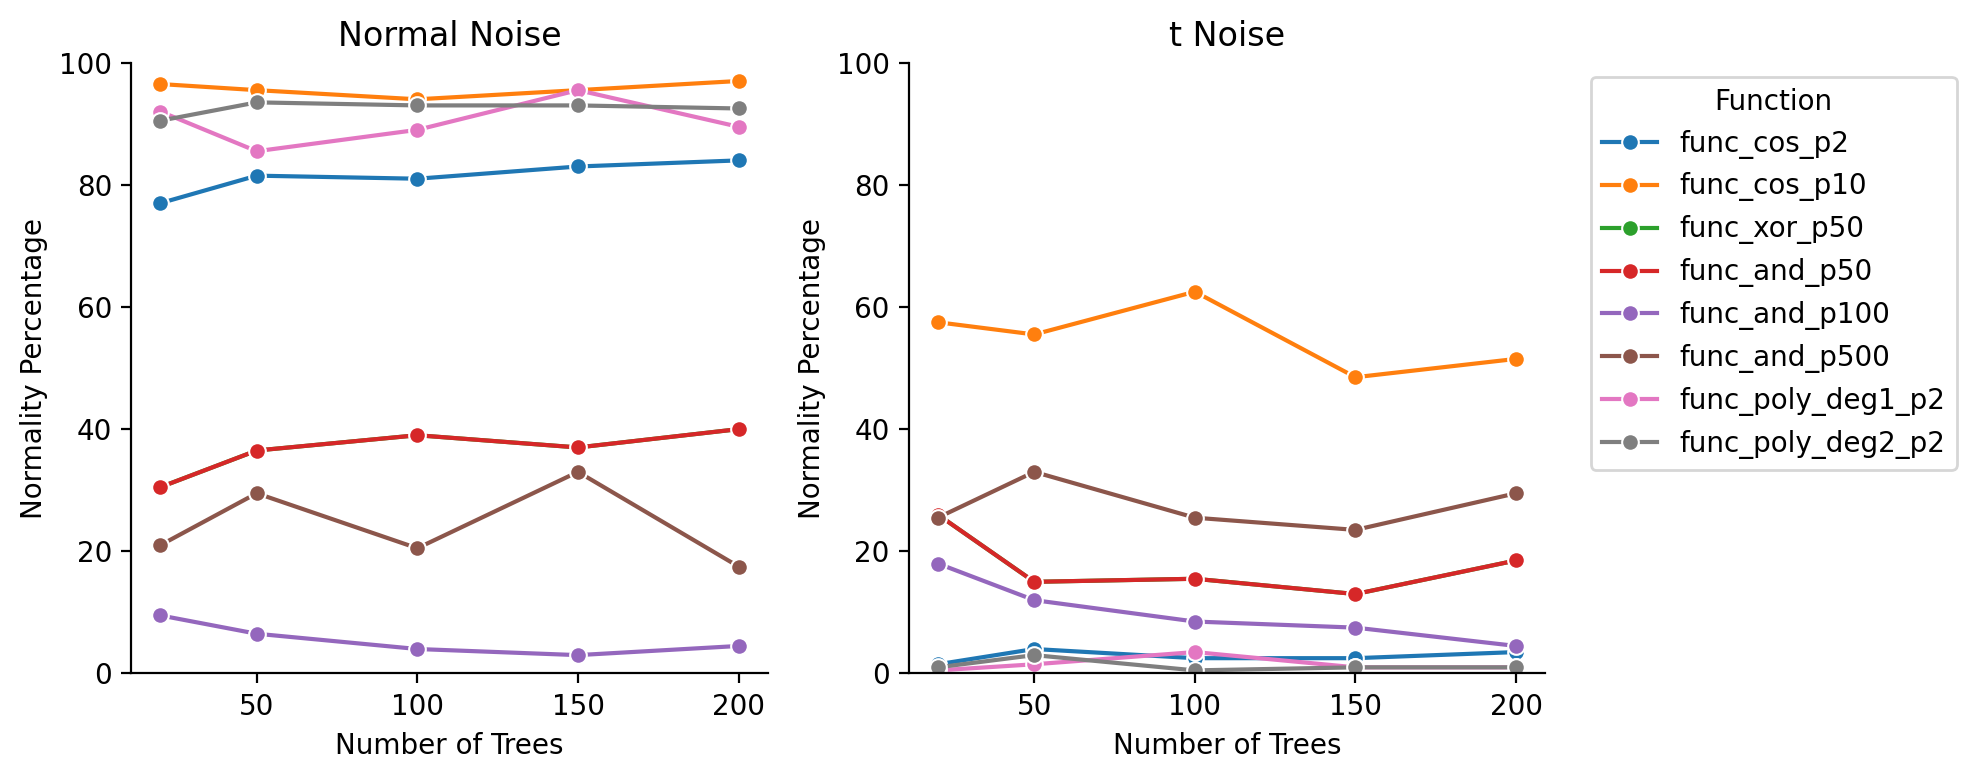

In [74]:
noise_normal = data_melt[(data_melt['Noise'] == 'normal') & (data_melt['type'] == 'Normal_Pct_Finite') & (data_melt['N_Train'] == 200)]
noise_t = data_melt[(data_melt['Noise'] == 't') & (data_melt['type'] == 'Normal_Pct_Finite') & (data_melt['N_Train'] == 200)]

# plotting two side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi =200)
sns.lineplot(data=noise_normal, x='N_Tree', y='pct', hue='Function', ax=axes[0], marker ='o')
sns.lineplot(data=noise_t, x='N_Tree', y='pct', hue='Function', ax=axes[1], marker ='o')
axes[0].set_title('Normal Noise')
axes[1].set_title('t Noise')
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)
axes[0].set_ylabel('Normality Percentage')
axes[1].set_ylabel('Normality Percentage')
axes[0].set_xlabel('Number of Trees')
axes[1].set_xlabel('Number of Trees')
# ax0 no legend
axes[0].legend_.remove()
# ax1 legend on the right
axes[1].legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# despline
sns.despine(ax=axes[0], top=True, right=True)
sns.despine(ax=axes[1], top=True, right=True)
plt.tight_layout()
# suptitle finite
plt.show()

In [75]:
data_melt_partial = data_melt[data_melt['Function'].isin(['func_cos_p2', 'func_xor_p50', 'func_and_p500', 'func_poly_deg2_p2'])]

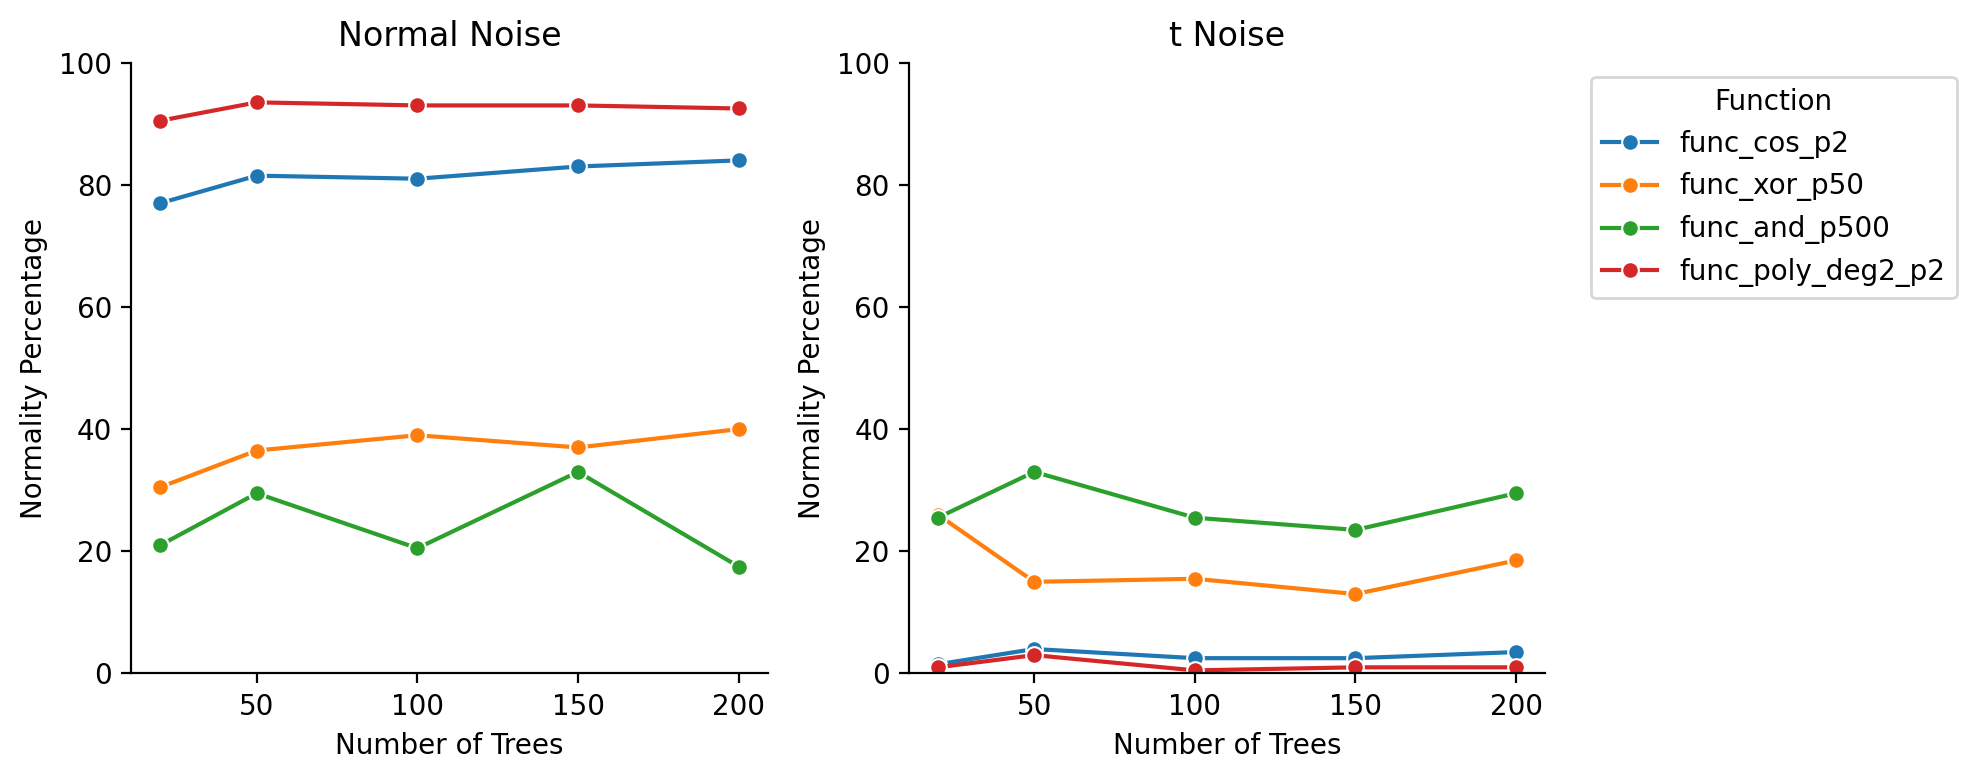

In [76]:
noise_normal = data_melt_partial[(data_melt_partial['Noise'] == 'normal') & (data_melt_partial['type'] == 'Normal_Pct_Finite') & (data_melt_partial['N_Train'] == 200)]
noise_t = data_melt_partial[(data_melt_partial['Noise'] == 't') & (data_melt_partial['type'] == 'Normal_Pct_Finite') & (data_melt_partial['N_Train'] == 200)]

# plotting two side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi =200)
sns.lineplot(data=noise_normal, x='N_Tree', y='pct', hue='Function', ax=axes[0], marker ='o')
sns.lineplot(data=noise_t, x='N_Tree', y='pct', hue='Function', ax=axes[1], marker ='o')
axes[0].set_title('Normal Noise')
axes[1].set_title('t Noise')
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)
axes[0].set_ylabel('Normality Percentage')
axes[1].set_ylabel('Normality Percentage')
axes[0].set_xlabel('Number of Trees')
axes[1].set_xlabel('Number of Trees')
# ax0 no legend
axes[0].legend_.remove()
# ax1 legend on the right
axes[1].legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')

# despline
sns.despine(ax=axes[0], top=True, right=True)
sns.despine(ax=axes[1], top=True, right=True)
plt.tight_layout()
# suptitle finite
plt.show()